In [2]:
import numpy as np
import pandas as pd   # ← typo here: should be 'import'
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv("../../data/togo-dapaong_qc.csv")
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


In [4]:
null_percentage = df.isna().mean() * 100  
columns_with_high_nulls = null_percentage[null_percentage > 5]
print(columns_with_high_nulls)

Comments    100.0
dtype: float64


In [5]:
from scipy.stats import zscore

cols_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = df[cols_to_check].apply(zscore)  # Compute Z-scores

# Flag rows where any |Z| > 3 (considered outliers)
outlier_flags = (z_scores.abs() > 3)
df['is_outlier'] = outlier_flags.any(axis=1)  # Mark True if any column exceeds Z=3

print(f"Total outliers detected: {df['is_outlier'].sum()}")

Total outliers detected: 9251


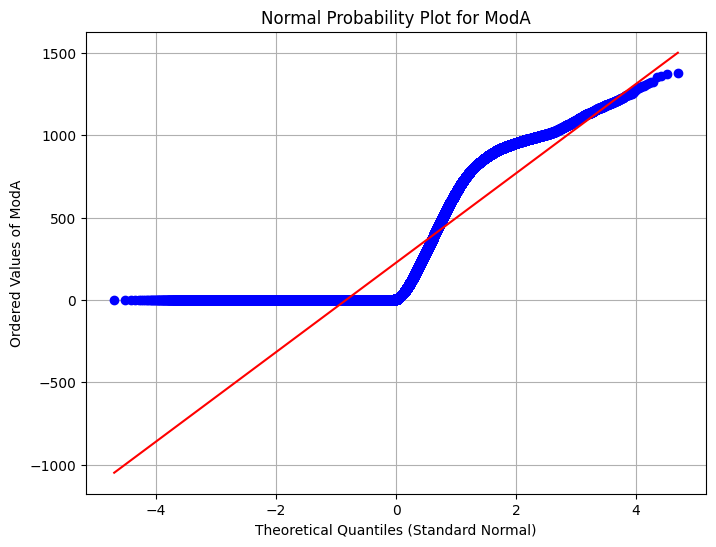

In [6]:
import scipy.stats as stats

# Normal Probability Plot for 'ModA'
plt.figure(figsize=(8, 6))
stats.probplot(df['ModA'], plot=plt)
plt.title('Normal Probability Plot for ModA')
plt.xlabel('Theoretical Quantiles (Standard Normal)')
plt.ylabel('Ordered Values of ModA')
plt.grid(True)
plt.show()

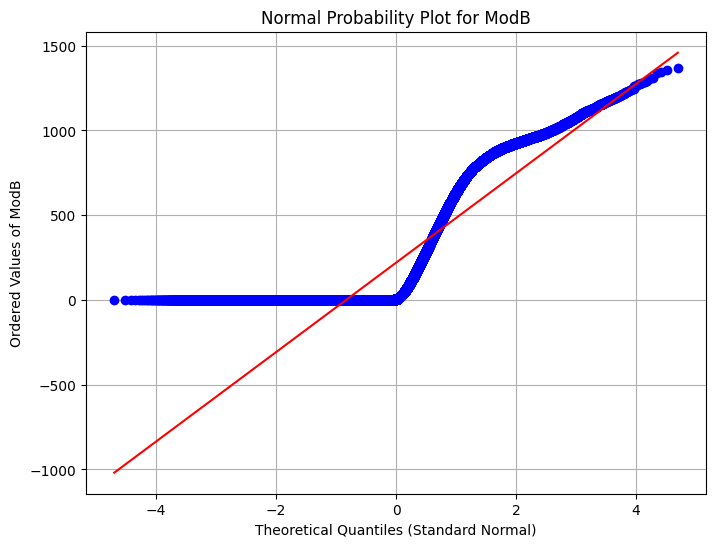

In [7]:
# Normal Probability Plot for 'ModB'
plt.figure(figsize=(8, 6))
stats.probplot(df['ModB'], plot=plt)
plt.title('Normal Probability Plot for ModB')
plt.xlabel('Theoretical Quantiles (Standard Normal)')
plt.ylabel('Ordered Values of ModB')
plt.grid(True)
plt.show()

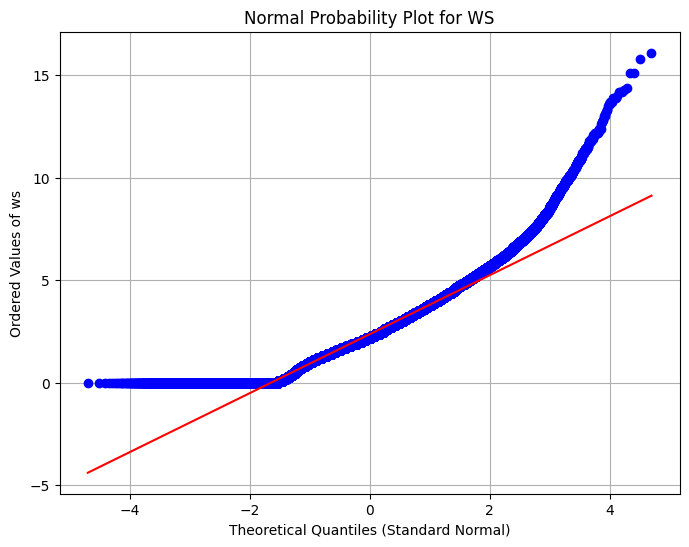

In [8]:
# Normal Probability Plot for 'ModB'
plt.figure(figsize=(8, 6))
stats.probplot(df['WS'], plot=plt)
plt.title('Normal Probability Plot for WS')
plt.xlabel('Theoretical Quantiles (Standard Normal)')
plt.ylabel('Ordered Values of ws')
plt.grid(True)
plt.show()

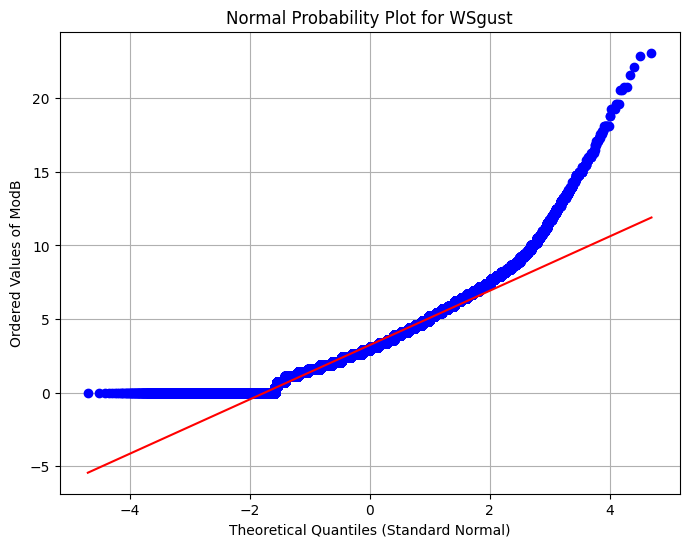

In [7]:
# Normal Probability Plot for 'ModB'
plt.figure(figsize=(8, 6))
stats.probplot(df['WSgust'], plot=plt)
plt.title('Normal Probability Plot for WSgust')
plt.xlabel('Theoretical Quantiles (Standard Normal)')
plt.ylabel('Ordered Values of ModB')
plt.grid(True)
plt.show()

In [8]:
for col in cols_to_check:
    if df[col].isna().any():
        df[col] = df[col].fillna(df[col].median())

# Step 4: Drop outlier rows (optional, if not just flagging)
df_cleaned_togo = df[~df['is_outlier']].drop(columns='is_outlier')

In [9]:
import os
country = 'togo'  # Replace with actual country
os.makedirs('data', exist_ok=True)
df_cleaned_togo.to_csv(f'data/{country}_clean.csv', index=False)

print(f"Cleaned data exported to data/{country}_clean.csv")

Cleaned data exported to data/togo_clean.csv


In [10]:
df = pd.read_csv('data/togo_clean.csv', parse_dates=['Timestamp'])

# Ensure Timestamp is datetime and set as index
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

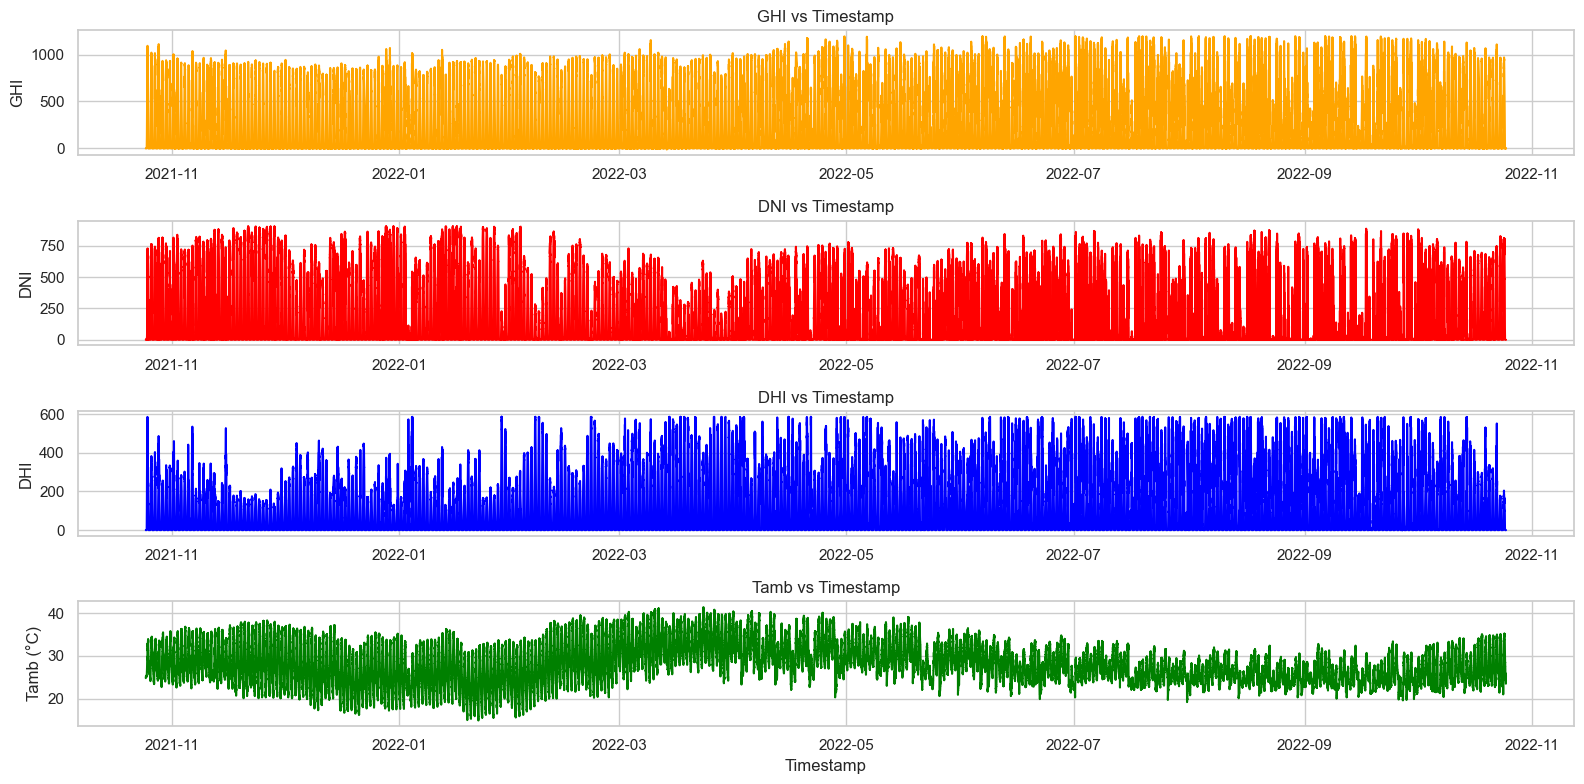

In [11]:
sns.set(style='whitegrid')

# Plot GHI, DNI, DHI, Tamb vs Timestamp
plt.figure(figsize=(16, 8))

# GHI
plt.subplot(4, 1, 1)
sns.lineplot(x='Timestamp', y='GHI', data=df, color='orange')
plt.title('GHI vs Timestamp')
plt.xlabel('')
plt.ylabel('GHI')

# DNI
plt.subplot(4, 1, 2)
sns.lineplot(x='Timestamp', y='DNI', data=df, color='red')
plt.title('DNI vs Timestamp')
plt.xlabel('')
plt.ylabel('DNI')

# DHI
plt.subplot(4, 1, 3)
sns.lineplot(x='Timestamp', y='DHI', data=df, color='blue')
plt.title('DHI vs Timestamp')
plt.xlabel('')
plt.ylabel('DHI')

# Tamb
plt.subplot(4, 1, 4)
sns.lineplot(x='Timestamp', y='Tamb', data=df, color='green')
plt.title('Tamb vs Timestamp')
plt.xlabel('Timestamp')
plt.ylabel('Tamb (°C)')

plt.tight_layout()
plt.show()

### 📈 Time Series Plots: GHI, DNI, DHI, and Tamb vs. Timestamp

This graph displays four time series plots, each showing how a different environmental variable changes over time from roughly **November 2021 to November 2022**. Let's interpret each subplot:

---

#### 🔶 Top Plot: GHI vs. Timestamp (Orange Line)

- **GHI** stands for **Global Horizontal Irradiance** — the total solar radiation received on a horizontal surface.

**Key Observations:**

- **Overall Trend**: The orange line shows a generally high level of GHI throughout the year, with distinct daily fluctuations.
- **Seasonal Pattern**: 
  - Peaks in daily GHI appear higher and more consistent between **March and September**, suggesting **stronger solar intensity** in this period.
  - Lower values and greater variability can be observed in the months outside this window.
- **Daily Cycle**:
  - The jagged line shape reflects the **typical daily solar cycle**.
  - GHI **rises in the morning**, **peaks around solar noon**, and **drops to zero at night** — as expected due to the Earth's rotation.


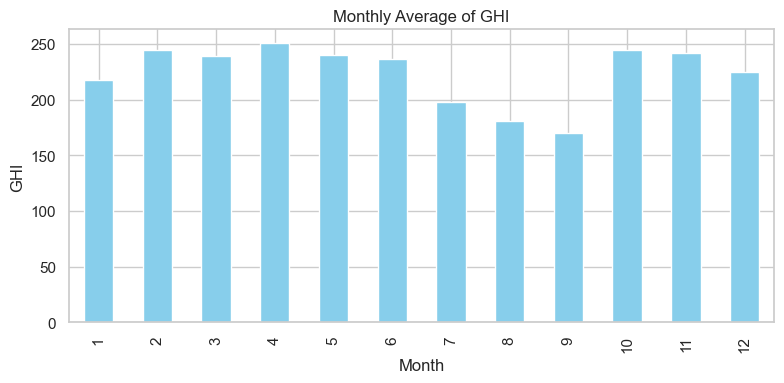

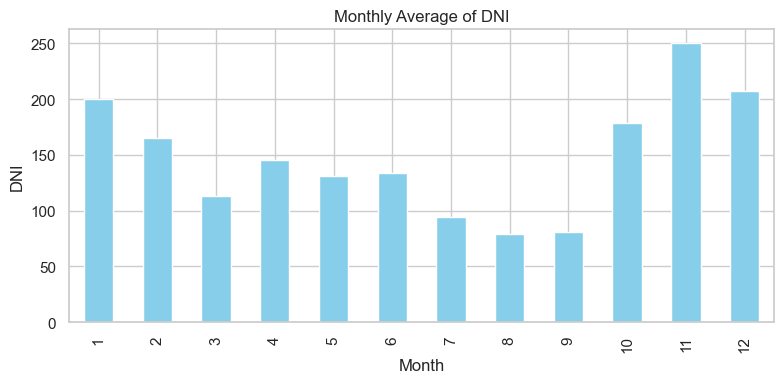

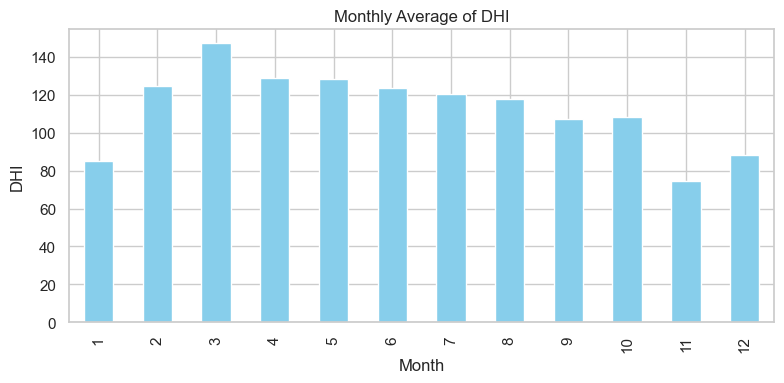

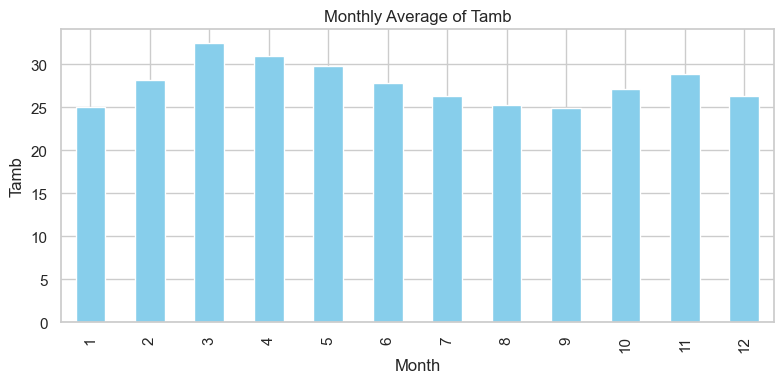

In [12]:
df['Month'] = df.index.month
monthly_avg = df.groupby('Month')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()
for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
    plt.figure(figsize=(8,4))
    monthly_avg[col].plot(kind='bar', color='skyblue')
    plt.title(f'Monthly Average of {col}')
    plt.xlabel('Month')
    plt.ylabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

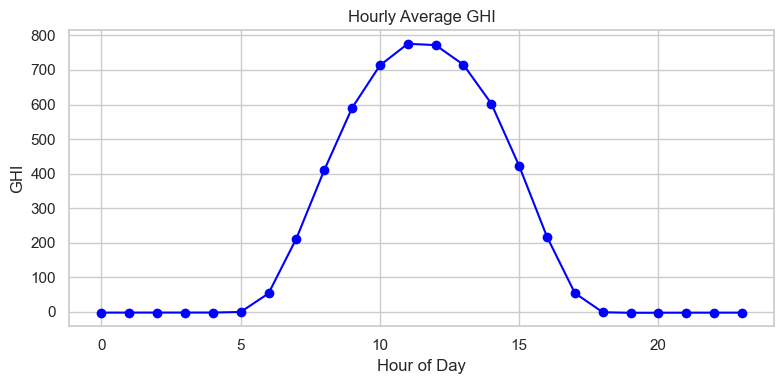

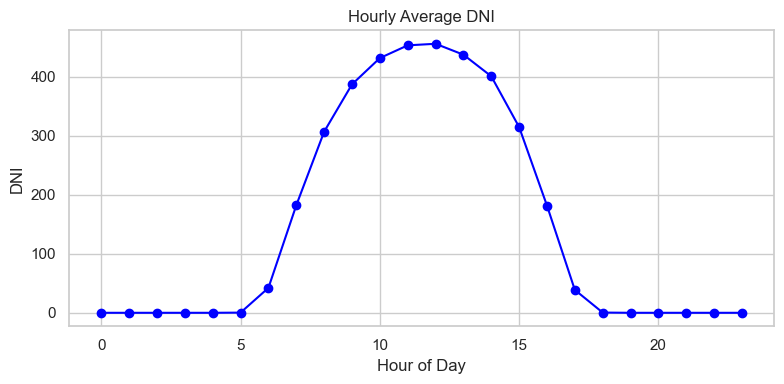

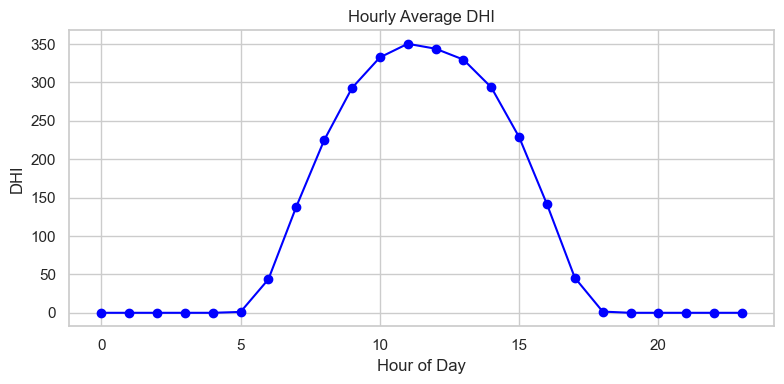

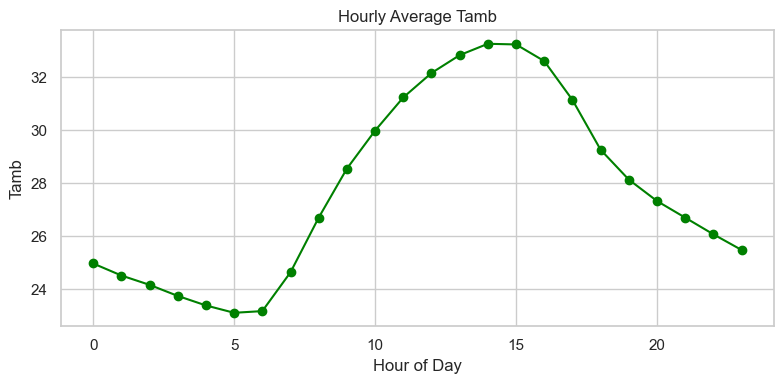

In [13]:
df['Hour'] = df.index.hour
hourly_avg = df.groupby('Hour')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
    plt.figure(figsize=(8,4))
    plt.plot(hourly_avg.index, hourly_avg[col], marker='o', color='green' if col=='Tamb' else 'blue')
    plt.title(f'Hourly Average {col}')
    plt.xlabel('Hour of Day')
    plt.ylabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

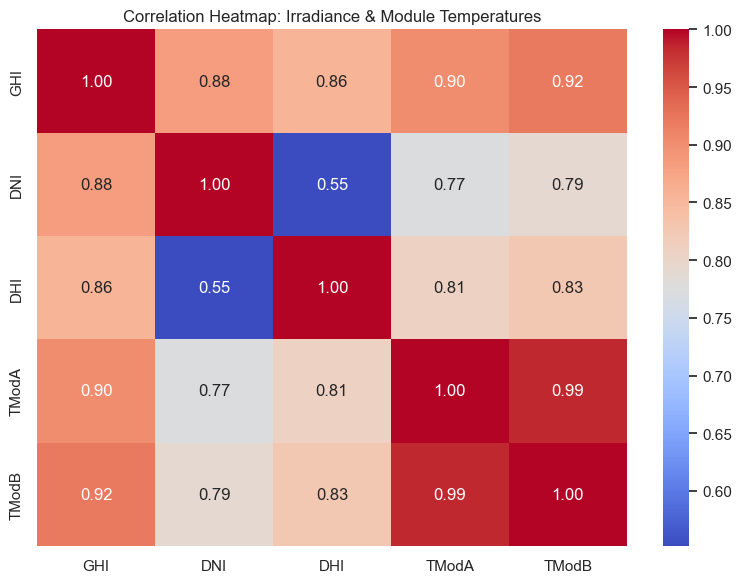

In [14]:
# Select relevant columns
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
corr_matrix = df[corr_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Irradiance & Module Temperatures')
plt.tight_layout()
plt.show()

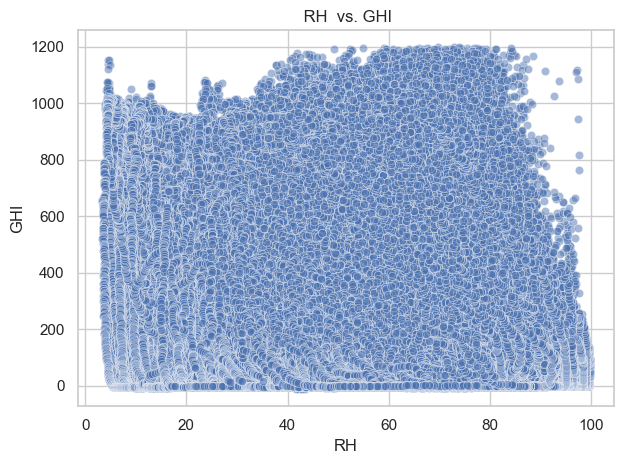

In [15]:
sns.scatterplot(data=df, x='RH', y='GHI', alpha=0.5)
plt.title(' RH  vs. GHI')  # Corrected this line
plt.xlabel('RH')
plt.ylabel('GHI')
plt.grid(True)
plt.tight_layout()
plt.show()

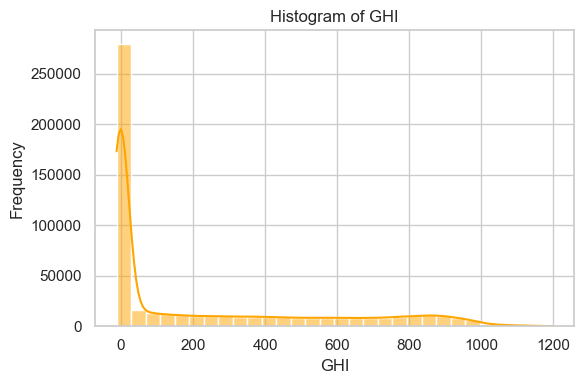

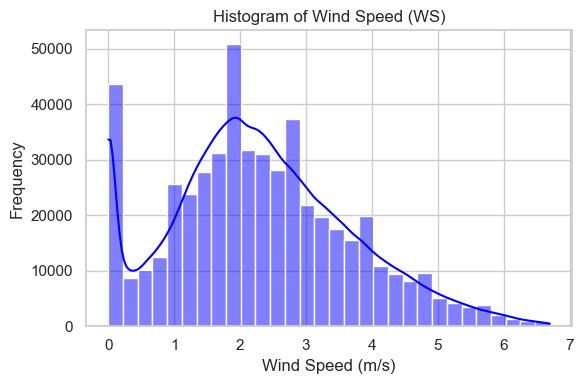

In [16]:
# Histogram for GHI
plt.figure(figsize=(6, 4))
sns.histplot(df['GHI'], bins=30, kde=True, color='orange')
plt.title('Histogram of GHI')
plt.xlabel('GHI')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

# Histogram for WS
plt.figure(figsize=(6, 4))
sns.histplot(df['WS'], bins=30, kde=True, color='blue')
plt.title('Histogram of Wind Speed (WS)')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

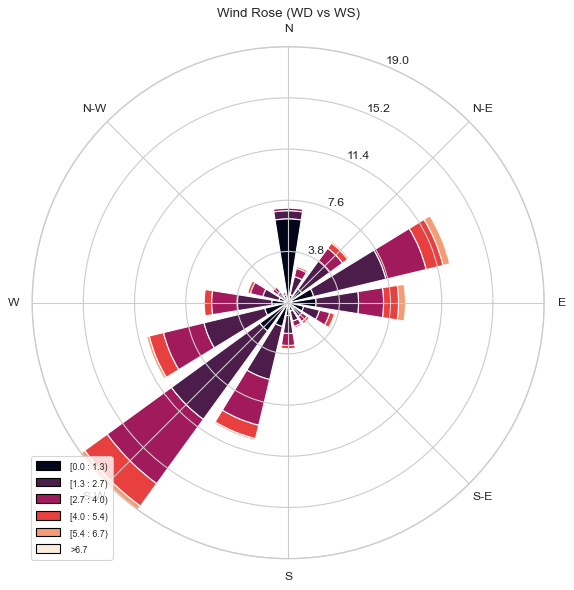

In [17]:
from windrose import WindroseAxes

# Create windrose plot
ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_title('Wind Rose (WD vs WS)')
ax.set_legend()
plt.show()

In [22]:
from scipy.stats import linregress

# Regression: RH vs Tamb
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(df['RH'], df['Tamb'])
print(f"Regression RH vs Tamb: Tamb = {slope1:.4f} * RH + {intercept1:.2f}")
print(f"R-squared: {r_value1**2:.4f}, p-value: {p_value1:.4f}")

# Regression: RH vs GHI
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(df['RH'], df['GHI'])
print(f"Regression RH vs GHI: GHI = {slope2:.4f} * RH + {intercept2:.2f}")
print(f"R-squared: {r_value2**2:.4f}, p-value: {p_value2:.4f}")

Regression RH vs Tamb: Tamb = -0.0655 * RH + 31.34
R-squared: 0.1561, p-value: 0.0000
Regression RH vs GHI: GHI = -2.7376 * RH + 374.93
R-squared: 0.0613, p-value: 0.0000


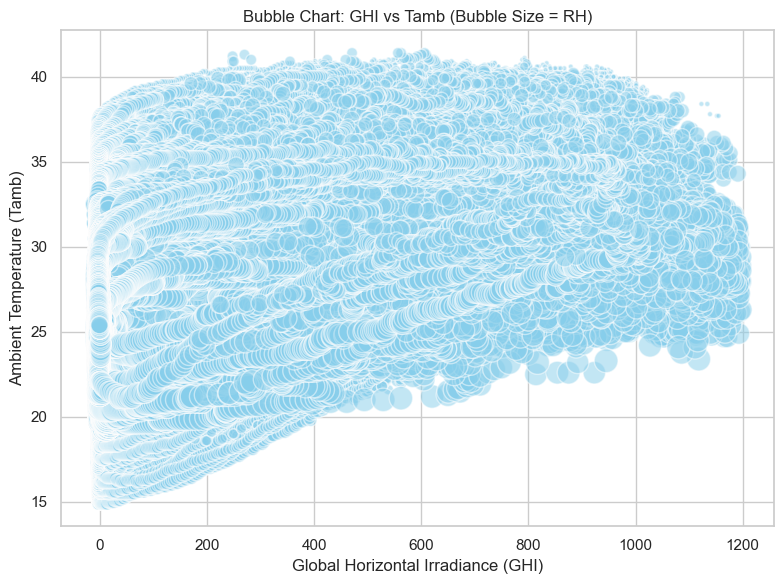

In [18]:
sizes = df['RH'] / df['RH'].max() * 300

plt.figure(figsize=(8, 6))
plt.scatter(df['GHI'], df['Tamb'], s=sizes, alpha=0.5, c='skyblue', edgecolors='w')
plt.xlabel('Global Horizontal Irradiance (GHI)')
plt.ylabel('Ambient Temperature (Tamb)')
plt.title('Bubble Chart: GHI vs Tamb (Bubble Size = RH)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,Month,Hour
count,516349.000000,516349.000000,516349.000000,516349.000000,516349.000000,516349.000000,516349.000000,516349.000000,516349.000000,516349.000000,516349.000000,516349.000000,516349.000000,516349.000000,516349.000000,516349.000000,516349.000000,0.0,516349.000000,516349.000000
mean,223.859675,147.975931,112.781249,219.380751,213.028150,27.727474,55.182807,2.312185,3.154247,0.548049,162.129322,10.491499,975.893919,0.000529,0.000952,32.312313,33.378512,NaN,6.550041,11.497936
std,317.306277,247.683690,151.571744,311.854841,302.625802,4.757337,28.698318,1.377997,1.762192,0.252824,92.028704,5.915056,2.147358,0.022988,0.018621,10.957090,12.718462,NaN,3.444586,6.959371
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN,1.000000,0.000000
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.800000,1.400000,1.900000,0.400000,74.700000,6.800000,975.000000,0.000000,0.000000,23.800000,23.600000,NaN,4.000000,5.000000
50%,0.500000,0.000000,1.500000,2.800000,2.800000,27.200000,59.400000,2.200000,2.900000,0.500000,200.200000,10.700000,976.000000,0.000000,0.000000,28.200000,28.200000,NaN,7.000000,12.000000
75%,423.200000,237.900000,211.600000,404.100000,393.100000,31.000000,81.000000,3.200000,4.100000,0.700000,233.700000,14.000000,977.000000,0.000000,0.000000,40.300000,42.600000,NaN,10.000000,18.000000
max,1198.000000,904.100000,586.000000,1171.200000,1143.000000,41.400000,99.800000,6.700000,8.800000,2.700000,360.000000,86.900000,983.000000,1.000000,1.800000,70.400000,94.600000,NaN,12.000000,23.000000
